In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [12]:
dataset = pd.read_csv('/content/Salary.csv')
dataset = dataset.drop(columns=['serial_no'])

In [13]:
X = dataset[['YearsExperience']].values
y = dataset['Salary'].values

In [14]:
# Normalizing features
X = (X - np.mean(X)) / np.std(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [17]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


In [18]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [19]:
theta = np.zeros(2)
learning_rate = 0.01
iterations = 1000

In [20]:
theta = np.zeros(2)
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train_b, y_train, theta, learning_rate, iterations)

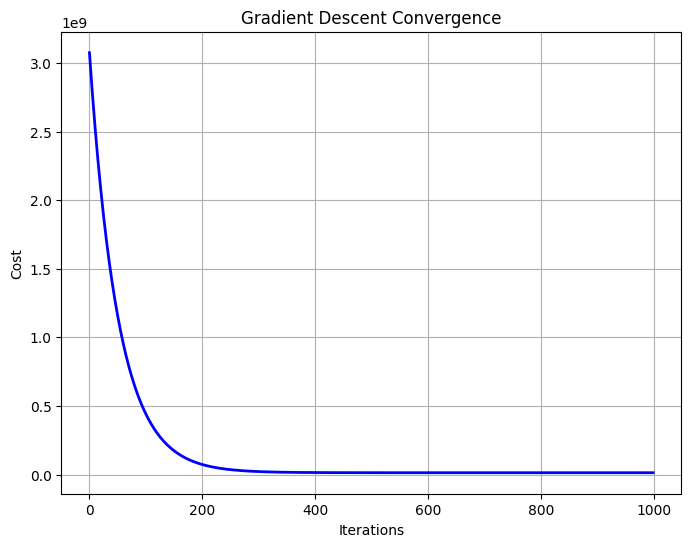

In [25]:
theta = np.zeros(2)
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train_b, y_train, theta, learning_rate, iterations)
plt.figure(figsize=(8,6))
plt.plot(range(iterations), cost_history, color='blue', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.grid()
plt.show()

In [22]:
y_train_pred = X_train_b.dot(theta)
y_test_pred = X_test_b.dot(theta)

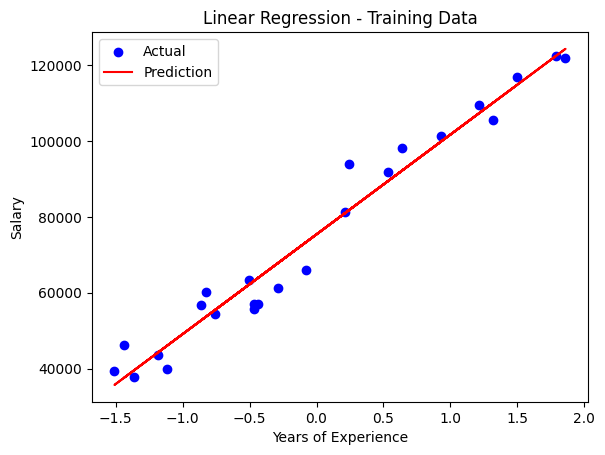

In [23]:
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression - Training Data')
plt.legend()
plt.show()

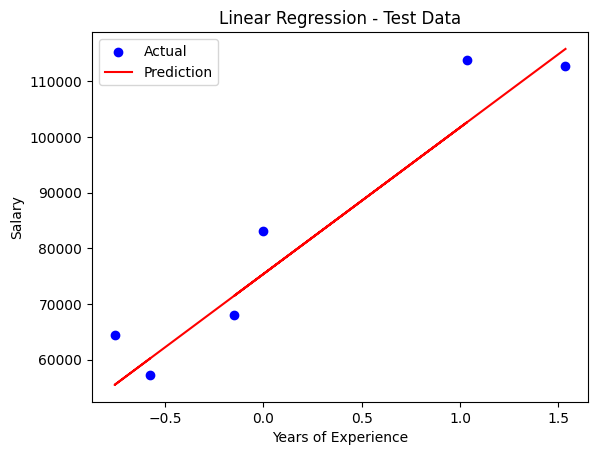

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression - Test Data')
plt.legend()
plt.show()

